## Homework 8 

Gabriel Mastromatteo 1006749761 

## Question 1 

First, I chose breast cancer data found on kaggle. It had a dummy variable that is B for benign and M for malignant. I will now code it to be 0 for benign and 1 for malignant 

In [21]:
# Imports
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the data
df = pd.read_csv('breast-cancer.csv')

# 2. Preprocess the data
# Convert the binary target to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Drop 'id' column
df = df.drop(columns=['id'])

# Separate predictors and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].values

# Standardize predictors (important for logistic regression in Bayesian models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of predictors
p = X_scaled.shape[1]

#### Now for the pymc logistic regression model 

In [5]:
# 3. Build the Bayesian Logistic Regression Model
with pm.Model() as logistic_model:
    
    # Prior for the coefficients (betas)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    
    # Prior for the intercept
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
    # Logistic regression equation: logit(p) = intercept + X * betas
    logit_p = intercept + pm.math.dot(X_scaled, betas)
    
    # Likelihood (Bernoulli)
    likelihood = pm.Bernoulli('likelihood', logit_p=logit_p, observed=y)
    
    # 4. Inference: Sample from the posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 324 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 8000 divergences after tuning. Increase `target_accept` or reparameterize.


#### Now the posterior analysis 

In [6]:
# Summary of the posterior
az.summary(trace, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   0.75  1.07   -1.15     2.72       0.18     0.09     36.13   
betas[1]   0.07  0.44   -0.77     0.90       0.10     0.06     19.42   
betas[2]   0.57  0.97   -0.72     2.53       0.31     0.08     11.12   
betas[3]   0.29  0.91   -1.31     2.20       0.15     0.07     39.49   
betas[4]   0.19  0.45   -0.59     1.02       0.10     0.04     19.75   
betas[5]  -0.51  0.70   -1.69     0.84       0.17     0.05     16.31   
betas[6]   0.66  0.80   -0.69     2.43       0.25     0.07     11.11   
betas[7]   1.24  0.72   -0.10     2.62       0.10     0.06     50.61   
betas[8]  -0.22  0.45   -0.95     0.75       0.10     0.07     24.37   
betas[9]  -0.77  0.88   -2.56     0.62       0.30     0.10      8.37   
betas[10]  1.58  0.76    0.20     3.01       0.17     0.10     21.32   
betas[11] -0.17  0.41   -0.74     0.64       0.17     0.05      6.13   
betas[12]  0.56  0.84   -0.87     2.25       0.27     0.06     10.39   
betas[13] -0.72  0.64   -2.20     0.33       0.19     0.12     12.08   
betas[14]  0.30  0.48   -0.37     1.15       0.17     0.05      8.43   
betas[15] -0.50  0.54   -1.44     0.48       0.12     0.06     20.71   
betas[16] -0.09  0.61   -1.13     1.00       0.13     0.07     22.35   
betas[17]  0.35  0.54   -0.60     1.41       0.14     0.10     17.41   
betas[18] -0.05  0.39   -0.79     0.72       0.05     0.03     68.12   
betas[19] -0.73  0.70   -1.89     0.49       0.24     0.05      8.51   
betas[20]  1.17  0.95   -0.51     3.12       0.12     0.06     58.21   
betas[21]  1.55  0.53    0.64     2.62       0.18     0.09      8.56   
betas[22]  0.91  0.77   -0.38     2.53       0.16     0.10     26.40   
betas[23]  0.29  0.77   -1.09     1.68       0.24     0.14      9.84   
betas[24]  0.79  0.77   -0.34     2.22       0.32     0.12      6.44   
betas[25] -0.11  0.75   -1.79     1.25       0.18     0.08     19.08   
betas[26]  0.62  0.68   -0.54     1.89       0.14     0.05     23.87   
betas[27]  0.69  0.67   -0.56     1.94       0.16     0.04     17.34   
betas[28]  0.82  0.46   -0.04     1.68       0.10     0.05     22.70   
betas[29]  0.84  0.72   -0.40     2.20       0.19     0.06     14.92   
intercept -0.69  0.33   -1.29    -0.01       0.05     0.03     46.53   

           ess_tail  r_hat  
betas[0]      53.46   1.09  
betas[1]      69.41   1.20  
betas[2]      77.40   1.27  
betas[3]      73.19   1.09  
betas[4]      76.88   1.15  
betas[5]     132.45   1.18  
betas[6]      60.96   1.31  
betas[7]      69.67   1.08  
betas[8]      89.45   1.16  
betas[9]      27.67   1.43  
betas[10]     48.20   1.17  
betas[11]     11.48   1.75  
betas[12]     46.73   1.30  
betas[13]     13.91   1.25  
betas[14]     38.79   1.44  
betas[15]    101.38   1.14  
betas[16]     35.78   1.13  
betas[17]     14.52   1.21  
betas[18]     94.84   1.07  
betas[19]     55.41   1.40  
betas[20]     98.65   1.05  
betas[21]     19.65   1.41  
betas[22]     68.45   1.16  
betas[23]     22.06   1.34  
betas[24]     27.85   1.69  
betas[25]     28.61   1.16  
betas[26]    100.24   1.12  
betas[27]     52.10   1.21  
betas[28]     42.72   1.14  
betas[29]     61.09   1.21  
intercept     92.87   1.07

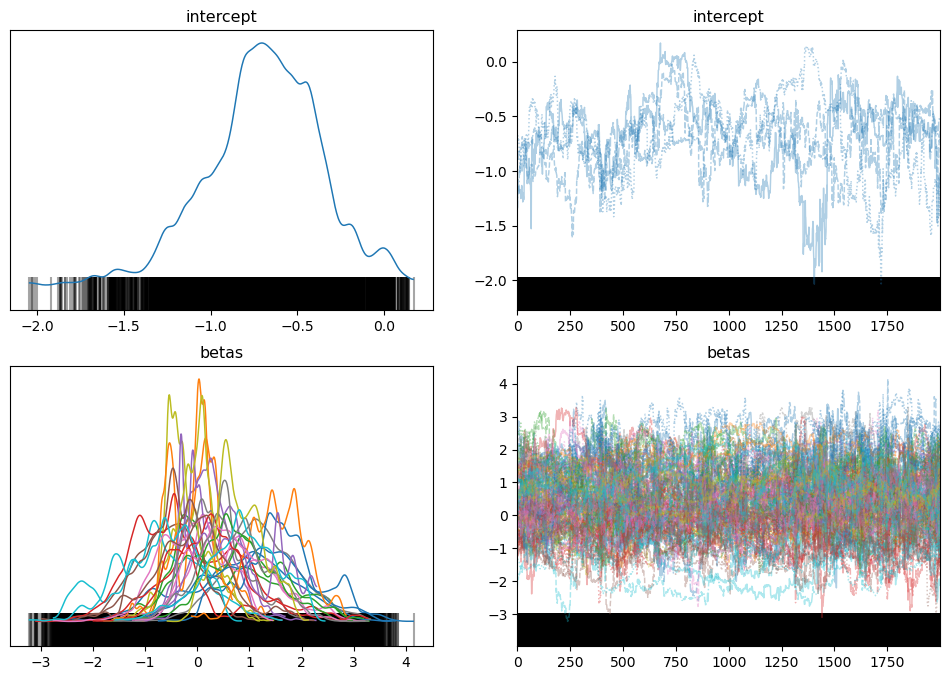

In [20]:
# Trace plots for betas and intercept
az.plot_trace(
    trace,
    var_names=['intercept', 'betas'],
    combined=True,       # Both trace and posterior in one row
    figsize=(12, 8)     # Width, Height → Increase height for more spacing
)
plt.show()


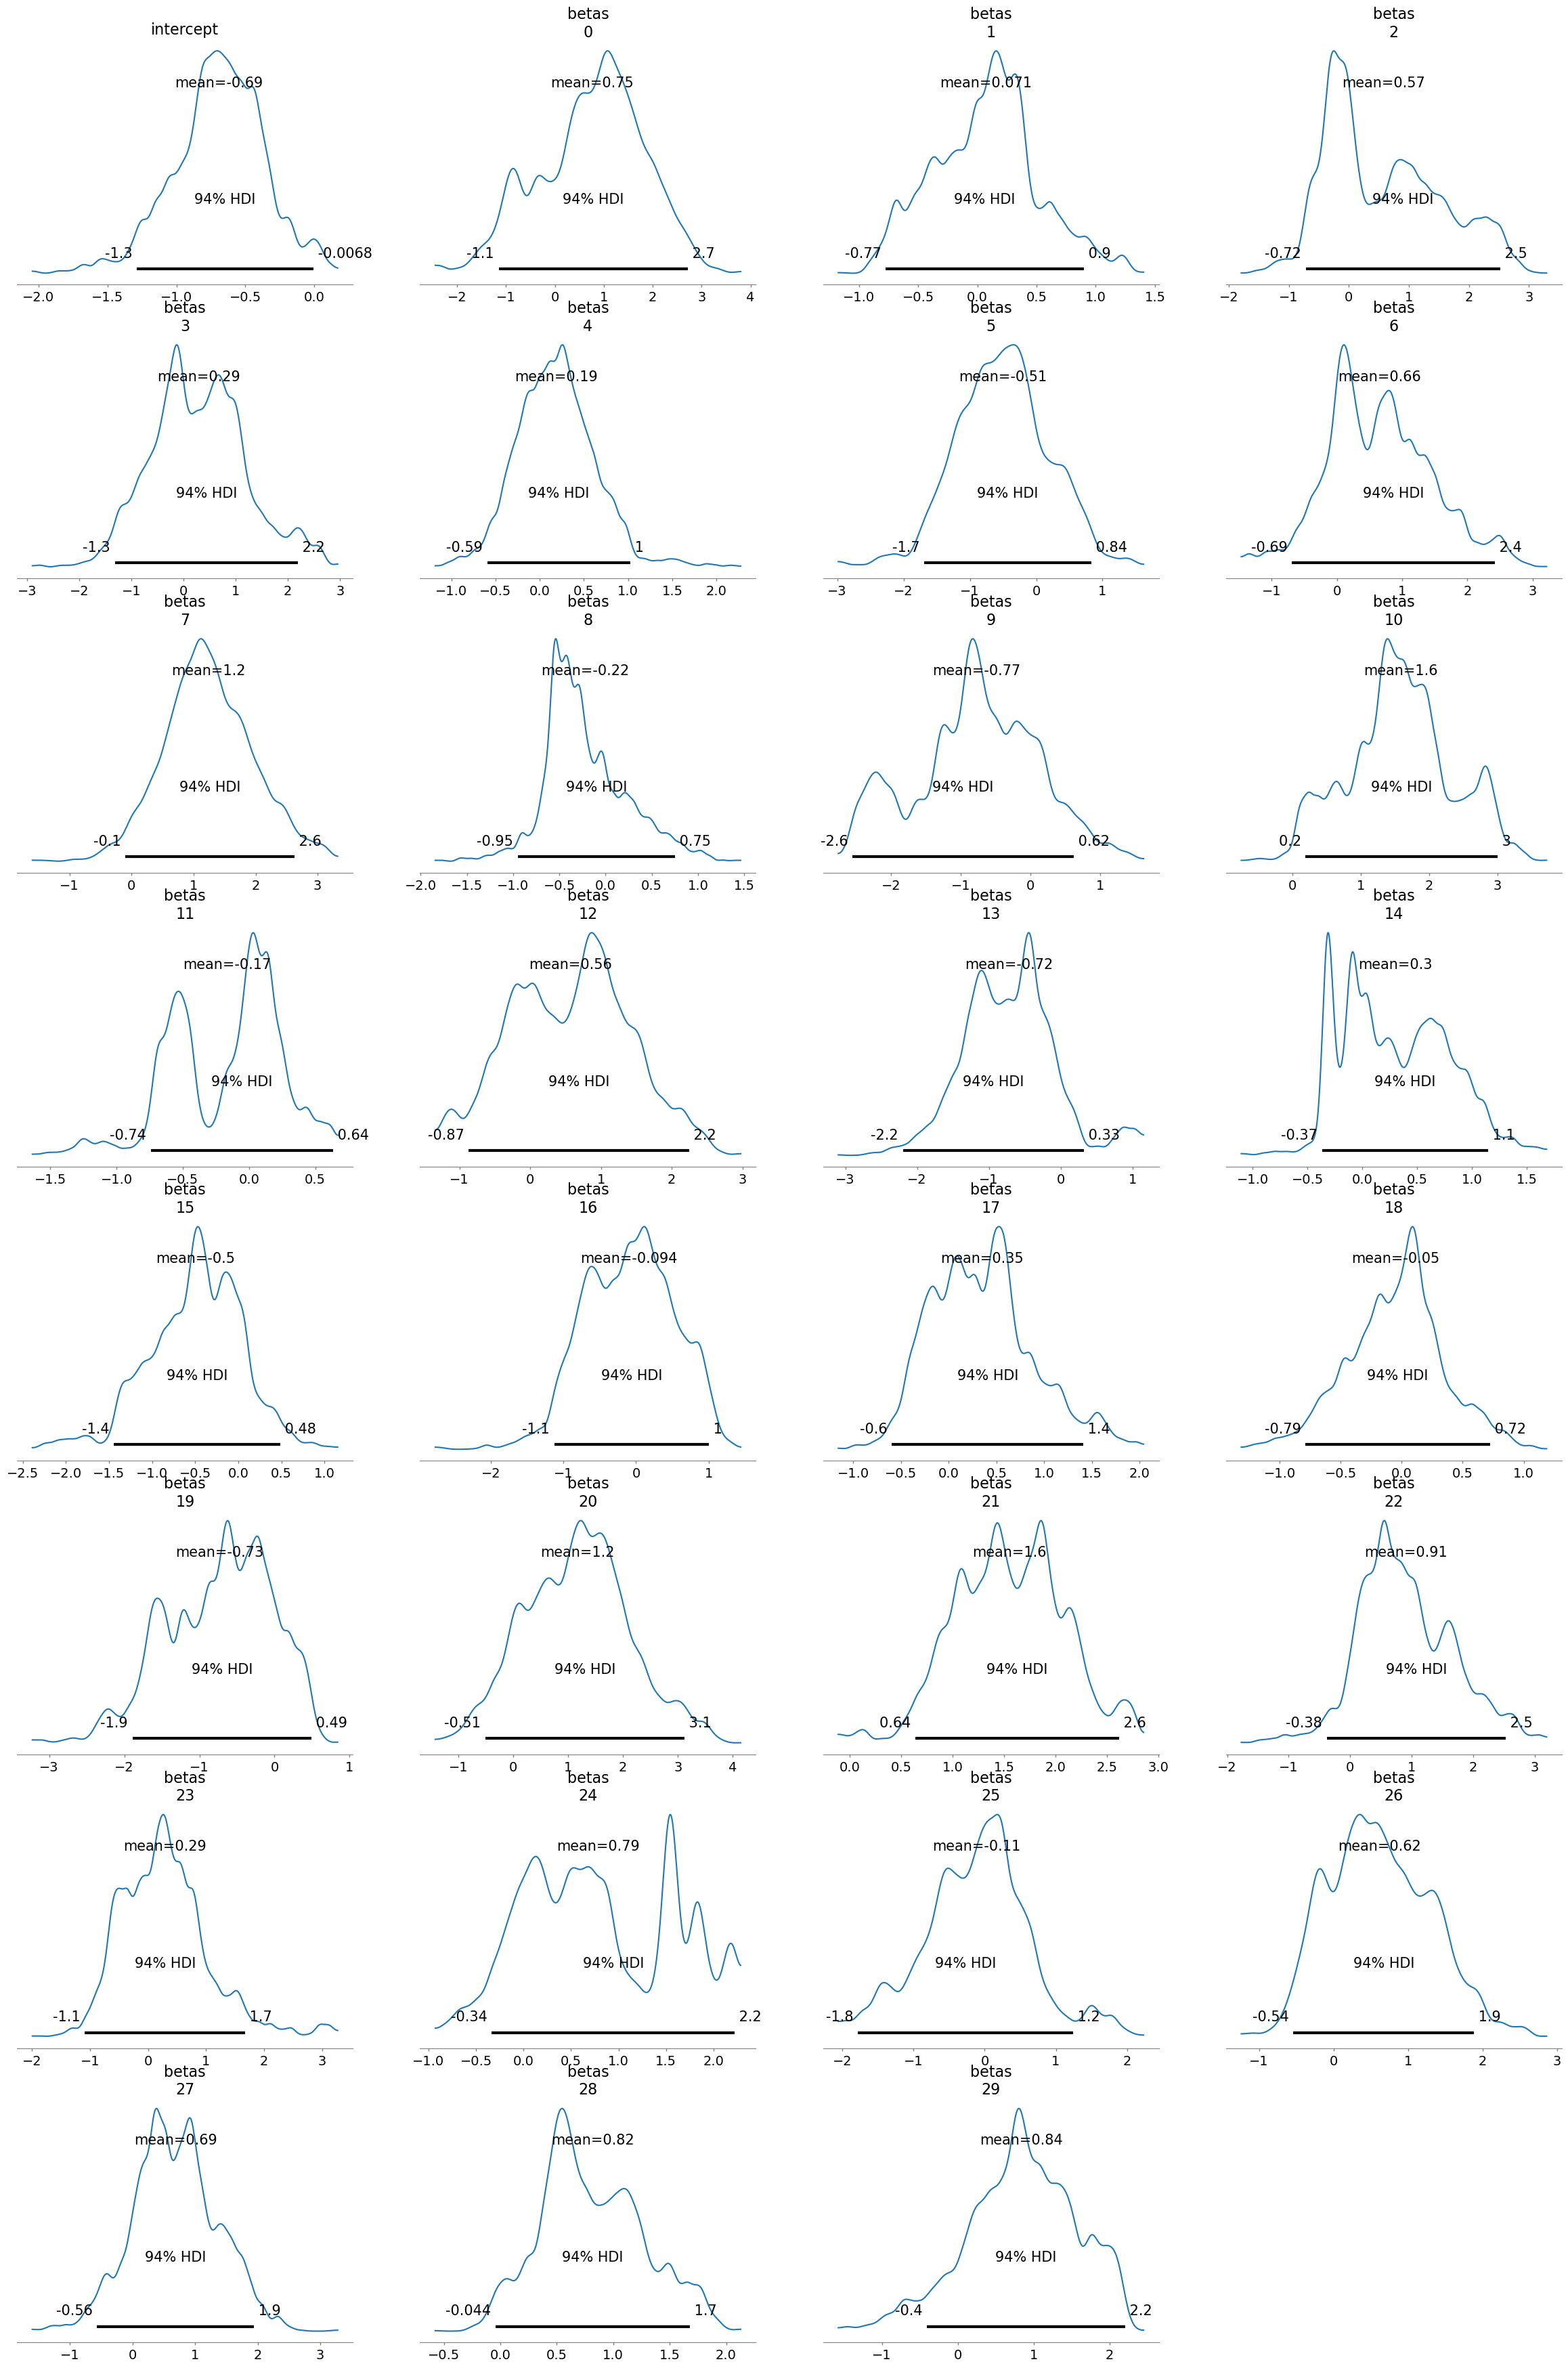

In [10]:
# Posterior density plots
az.plot_posterior(trace, var_names=['intercept', 'betas'])
plt.show()

## Question 2 

#### Use data on an array of mens body meaurment data. First the data was with women but that introduced a dummy variable. So i will filter it to be just men. 

In [4]:
# Imports
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Filter the dataset to only include men
men_df = body_df[body_df['Gender'] == 1.0].copy()

# 3. Drop Gender (it's constant now) and clean column names (remove trailing spaces)
men_df.drop(columns=['Gender'], inplace=True)
men_df.columns = men_df.columns.str.strip()

# Quick look at all available columns
print("Available columns:")
print(men_df.columns.tolist())

# 4. Define the columns you'll use for predictors (X) and outcomes (Y)
# You can adjust the lists based on your n, p, m experiments
predictor_cols = ['Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly']
outcome_cols = ['Waist', 'Hips', 'TotalHeight', 'LegLength', 'ArmLength']

# 5. Standardize the predictors and outcomes (separately if you like)
scaler = StandardScaler()

# Scale all columns to make slicing easy later
scaled_data = scaler.fit_transform(men_df)

# Convert back to DataFrame for easy access
men_df_scaled = pd.DataFrame(scaled_data, columns=men_df.columns)

Available columns:
['Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']


#### Define the mulitvariate regression model in pymc 

In [5]:
def run_bayesian_multivariate_regression_explicit(n, p, m):
    # Define specific predictor and outcome columns
    predictor_cols = ['Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly']
    outcome_cols = ['Waist', 'Hips', 'TotalHeight', 'LegLength', 'ArmLength']
    
    # Select based on p and m
    X = men_df_scaled[predictor_cols[:p]].iloc[:n].values
    Y = men_df_scaled[outcome_cols[:m]].iloc[:n].values
    
    with pm.Model() as MVR_model:
        
        betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
        
        packed_L = pm.LKJCholeskyCov('packed_L', n=m, eta=2.0,
                                     sd_dist=pm.Exponential.dist(1.0, shape=m),
                                     compute_corr=False)
        L = pm.expand_packed_triangular(m, packed_L)
        
        Sigma = pm.Deterministic('Sigma', L.dot(L.T))
        
        mu = pm.math.dot(X, betas)
        y_obs = pm.MvNormal('y_obs', mu=mu, chol=L, observed=Y)
        
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9, return_inferencedata=True)
    
    return trace

#### Run Different n,m,p's

In [6]:
# 4. Define the combinations of n, p, m to explore
combinations = [
    (50, 3, 2),
    (60, 4, 3),
    (80, 5, 4),
    (100, 6, 5)
]

# 5. Run the loop and collect traces
traces = {}

for n, p, m in combinations:
    print(f"Running model with n={n}, p={p}, m={m}")
    trace = run_bayesian_multivariate_regression(n, p, m)
    traces[(n, p, m)] = trace
    print(f"Finished model with n={n}, p={p}, m={m}\n")


Running model with n=50, p=3, m=2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model with n=50, p=3, m=2

Running model with n=60, p=4, m=3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 38 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model with n=60, p=4, m=3

Running model with n=80, p=5, m=4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 34 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model with n=80, p=5, m=4

Running model with n=100, p=6, m=5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 36 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model with n=100, p=6, m=5



#### Summary Statistics

In [8]:
# Loop to print trace summaries for each n, p, m combo
for (n, p, m), trace in traces.items():
    print(f"\nPosterior Summary for n={n}, p={p}, m={m}")
    
    # Display the summary of betas and Sigma
    summary = az.summary(trace, var_names=['betas', 'Sigma'], round_to=2)
    
    # If running in Jupyter, you can use display for nicer formatting
    display(summary)


Posterior Summary for n=50, p=3, m=2


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]  0.21  0.16   -0.06     0.53       0.01     0.00    739.45   
betas[0, 1] -0.40  0.18   -0.71    -0.06       0.01     0.01    386.61   
betas[1, 0] -0.05  0.10   -0.24     0.14       0.00     0.00    916.97   
betas[1, 1]  0.19  0.11   -0.01     0.41       0.00     0.00    737.07   
betas[2, 0]  0.28  0.15   -0.01     0.55       0.01     0.00    678.53   
betas[2, 1]  0.05  0.17   -0.29     0.34       0.01     0.01    415.05   
Sigma[0, 0]  0.57  0.12    0.36     0.80       0.00     0.00   1019.02   
Sigma[0, 1]  0.15  0.10   -0.02     0.34       0.00     0.00    768.99   
Sigma[1, 0]  0.15  0.10   -0.02     0.34       0.00     0.00    768.99   
Sigma[1, 1]  0.74  0.16    0.47     1.05       0.01     0.01   1083.74   

             ess_tail  r_hat  
betas[0, 0]    646.93   1.00  
betas[0, 1]    436.26   1.01  
betas[1, 0]    534.25   1.00  
betas[1, 1]    761.87   1.00  
betas[2, 0]    782.98   1.00  
betas[2, 1]    489.88   1.00  
Sigma[0, 0]    796.65   1.00  
Sigma[0, 1]    761.24   1.00  
Sigma[1, 0]    761.24   1.00  
Sigma[1, 1]    649.46   1.00


Posterior Summary for n=60, p=4, m=3


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.41  0.14   -0.64    -0.13       0.00     0.00    992.03   
betas[0, 1] -0.21  0.17   -0.54     0.10       0.01     0.00   1054.48   
betas[0, 2] -0.04  0.10   -0.23     0.16       0.00     0.00    973.98   
betas[1, 0]  0.26  0.11    0.07     0.47       0.00     0.00   1187.67   
betas[1, 1] -0.16  0.13   -0.41     0.08       0.00     0.00   1503.71   
betas[1, 2]  0.16  0.07    0.03     0.30       0.00     0.00   1119.29   
betas[2, 0] -0.08  0.14   -0.36     0.18       0.00     0.00    874.24   
betas[2, 1]  0.18  0.18   -0.11     0.54       0.01     0.00   1020.62   
betas[2, 2]  0.10  0.10   -0.08     0.29       0.00     0.00    877.32   
betas[3, 0]  0.37  0.15    0.12     0.67       0.00     0.00    932.95   
betas[3, 1]  0.62  0.18    0.29     0.94       0.01     0.01    951.70   
betas[3, 2]  0.36  0.10    0.16     0.55       0.00     0.00   1090.85   
Sigma[0, 0]  0.71  0.13    0.49     0.95       0.00     0.00    967.48   
Sigma[0, 1]  0.26  0.12    0.02     0.49       0.00     0.00   1082.78   
Sigma[0, 2]  0.19  0.07    0.07     0.32       0.00     0.00   1222.08   
Sigma[1, 0]  0.26  0.12    0.02     0.49       0.00     0.00   1082.78   
Sigma[1, 1]  1.13  0.23    0.74     1.56       0.01     0.01   1056.41   
Sigma[1, 2] -0.07  0.08   -0.22     0.08       0.00     0.00   1036.03   
Sigma[2, 0]  0.19  0.07    0.07     0.32       0.00     0.00   1222.08   
Sigma[2, 1] -0.07  0.08   -0.22     0.08       0.00     0.00   1036.03   
Sigma[2, 2]  0.34  0.07    0.23     0.46       0.00     0.00    961.89   

             ess_tail  r_hat  
betas[0, 0]    854.20    1.0  
betas[0, 1]    823.85    1.0  
betas[0, 2]    731.64    1.0  
betas[1, 0]    763.91    1.0  
betas[1, 1]    677.13    1.0  
betas[1, 2]    719.44    1.0  
betas[2, 0]    666.54    1.0  
betas[2, 1]    728.51    1.0  
betas[2, 2]    800.96    1.0  
betas[3, 0]    699.74    1.0  
betas[3, 1]    518.44    1.0  
betas[3, 2]    714.42    1.0  
Sigma[0, 0]    785.85    1.0  
Sigma[0, 1]    588.88    1.0  
Sigma[0, 2]    715.56    1.0  
Sigma[1, 0]    588.88    1.0  
Sigma[1, 1]    845.70    1.0  
Sigma[1, 2]    701.02    1.0  
Sigma[2, 0]    715.56    1.0  
Sigma[2, 1]    701.02    1.0  
Sigma[2, 2]    762.99    1.0


Posterior Summary for n=80, p=5, m=4


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.05  0.14   -0.29     0.19        0.0     0.00   1435.98   
betas[0, 1]  0.07  0.08   -0.09     0.20        0.0     0.00   1656.32   
betas[0, 2]  0.19  0.09    0.03     0.38        0.0     0.00   1276.81   
betas[0, 3]  0.01  0.15   -0.26     0.30        0.0     0.00   1330.45   
betas[1, 0] -0.16  0.10   -0.35     0.04        0.0     0.00   1979.17   
betas[1, 1]  0.08  0.06   -0.04     0.18        0.0     0.00   1330.28   
betas[1, 2]  0.22  0.07    0.10     0.37        0.0     0.00   1403.99   
betas[1, 3]  0.06  0.11   -0.13     0.28        0.0     0.00   1593.14   
betas[2, 0]  0.18  0.14   -0.08     0.44        0.0     0.00   1389.26   
betas[2, 1]  0.10  0.08   -0.03     0.27        0.0     0.00   1315.56   
betas[2, 2]  0.14  0.09   -0.03     0.31        0.0     0.00   1311.09   
betas[2, 3]  0.38  0.14    0.13     0.66        0.0     0.00   1361.09   
betas[3, 0]  0.41  0.15    0.16     0.70        0.0     0.00   1149.09   
betas[3, 1]  0.23  0.08    0.06     0.38        0.0     0.00   1238.01   
betas[3, 2] -0.02  0.10   -0.20     0.16        0.0     0.00   1290.27   
betas[3, 3]  0.24  0.15   -0.06     0.51        0.0     0.00   1301.51   
betas[4, 0]  0.35  0.12    0.13     0.58        0.0     0.00   2141.73   
betas[4, 1]  0.34  0.07    0.21     0.47        0.0     0.00   1362.42   
betas[4, 2]  0.08  0.09   -0.09     0.23        0.0     0.00   1234.05   
betas[4, 3] -0.26  0.13   -0.49    -0.03        0.0     0.00   1629.27   
Sigma[0, 0]  0.86  0.15    0.59     1.13        0.0     0.01   1161.36   
Sigma[0, 1] -0.09  0.05   -0.20     0.01        0.0     0.00    950.18   
Sigma[0, 2]  0.07  0.07   -0.06     0.19        0.0     0.00   1039.46   
Sigma[0, 3] -0.01  0.10   -0.18     0.17        0.0     0.00   1295.38   
Sigma[1, 0] -0.09  0.05   -0.20     0.01        0.0     0.00    950.18   
Sigma[1, 1]  0.26  0.04    0.19     0.33        0.0     0.00   1449.45   
Sigma[1, 2] -0.03  0.04   -0.10     0.04        0.0     0.00   1281.92   
Sigma[1, 3]  0.01  0.06   -0.10     0.11        0.0     0.00   1163.92   
Sigma[2, 0]  0.07  0.07   -0.06     0.19        0.0     0.00   1039.46   
Sigma[2, 1] -0.03  0.04   -0.10     0.04        0.0     0.00   1281.92   
Sigma[2, 2]  0.40  0.07    0.29     0.53        0.0     0.00   1220.03   
Sigma[2, 3]  0.16  0.07    0.03     0.31        0.0     0.00   1142.14   
Sigma[3, 0] -0.01  0.10   -0.18     0.17        0.0     0.00   1295.38   
Sigma[3, 1]  0.01  0.06   -0.10     0.11        0.0     0.00   1163.92   
Sigma[3, 2]  0.16  0.07    0.03     0.31        0.0     0.00   1142.14   
Sigma[3, 3]  0.93  0.15    0.65     1.17        0.0     0.00   1127.16   

             ess_tail  r_hat  
betas[0, 0]    872.53   1.00  
betas[0, 1]    668.59   1.00  
betas[0, 2]    784.76   1.00  
betas[0, 3]    791.69   1.00  
betas[1, 0]    619.80   1.01  
betas[1, 1]    650.94   1.00  
betas[1, 2]    853.59   1.00  
betas[1, 3]    731.54   1.00  
betas[2, 0]    696.25   1.00  
betas[2, 1]    780.82   1.00  
betas[2, 2]    766.39   1.00  
betas[2, 3]    552.51   1.00  
betas[3, 0]    787.36   1.00  
betas[3, 1]    819.59   1.01  
betas[3, 2]    874.61   1.00  
betas[3, 3]    793.42   1.00  
betas[4, 0]    922.46   1.00  
betas[4, 1]    822.91   1.00  
betas[4, 2]    723.51   1.00  
betas[4, 3]    851.82   1.00  
Sigma[0, 0]    615.29   1.00  
Sigma[0, 1]    568.26   1.01  
Sigma[0, 2]    667.29   1.00  
Sigma[0, 3]    670.90   1.01  
Sigma[1, 0]    568.26   1.01  
Sigma[1, 1]    818.53   1.00  
Sigma[1, 2]    716.70   1.00  
Sigma[1, 3]    854.17   1.00  
Sigma[2, 0]    667.29   1.00  
Sigma[2, 1]    716.70   1.00  
Sigma[2, 2]    613.15   1.01  
Sigma[2, 3]    647.76   1.00  
Sigma[3, 0]    670.90   1.01  
Sigma[3, 1]    854.17   1.00  
Sigma[3, 2]    647.76   1.00  
Sigma[3, 3]    817.02   1.00


Posterior Summary for n=100, p=6, m=5


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]  0.03  0.06   -0.08     0.13        0.0     0.00   1399.58   
betas[0, 1]  0.11  0.07   -0.04     0.23        0.0     0.00   1608.58   
betas[0, 2]  0.10  0.10   -0.08     0.30        0.0     0.00   1415.67   
betas[0, 3]  0.22  0.08    0.08     0.36        0.0     0.00   1377.98   
betas[0, 4]  0.05  0.12   -0.20     0.27        0.0     0.00   1302.95   
betas[1, 0]  0.06  0.04   -0.02     0.14        0.0     0.00   1360.07   
betas[1, 1]  0.20  0.06    0.10     0.32        0.0     0.00   1303.70   
betas[1, 2]  0.03  0.08   -0.10     0.18        0.0     0.00   1657.97   
betas[1, 3]  0.03  0.06   -0.08     0.15        0.0     0.00   1410.80   
betas[1, 4]  0.31  0.10    0.14     0.49        0.0     0.00   1356.08   
betas[2, 0]  0.15  0.06    0.04     0.27        0.0     0.00   1341.72   
betas[2, 1]  0.16  0.08    0.00     0.31        0.0     0.00   1751.55   
betas[2, 2]  0.28  0.12    0.07     0.50        0.0     0.00   1295.09   
betas[2, 3]  0.31  0.09    0.15     0.48        0.0     0.00   1446.12   
betas[2, 4] -0.02  0.13   -0.23     0.25        0.0     0.00   1171.45   
betas[3, 0]  0.21  0.08    0.08     0.36        0.0     0.00   1609.98   
betas[3, 1]  0.03  0.09   -0.13     0.19        0.0     0.00   1630.16   
betas[3, 2]  0.28  0.14    0.02     0.53        0.0     0.01   1473.92   
betas[3, 3]  0.10  0.10   -0.09     0.28        0.0     0.00   1164.09   
betas[3, 4] -0.37  0.15   -0.66    -0.10        0.0     0.00   1409.48   
betas[4, 0]  0.34  0.07    0.22     0.46        0.0     0.00   1260.41   
betas[4, 1]  0.03  0.08   -0.14     0.18        0.0     0.00   1078.01   
betas[4, 2] -0.23  0.13   -0.46     0.01        0.0     0.00   1388.33   
betas[4, 3] -0.06  0.09   -0.22     0.13        0.0     0.00    932.83   
betas[4, 4] -0.13  0.14   -0.41     0.13        0.0     0.00   1063.93   
betas[5, 0] -0.08  0.05   -0.19     0.01        0.0     0.00   1761.57   
betas[5, 1]  0.01  0.07   -0.12     0.14        0.0     0.00   1318.20   
betas[5, 2]  0.00  0.10   -0.19     0.18        0.0     0.00   1128.12   
betas[5, 3]  0.00  0.07   -0.14     0.13        0.0     0.00   1185.84   
betas[5, 4]  0.10  0.11   -0.10     0.31        0.0     0.00   1187.04   
Sigma[0, 0]  0.26  0.04    0.19     0.32        0.0     0.00   1955.50   
Sigma[0, 1] -0.02  0.04   -0.08     0.06        0.0     0.00   1586.57   
Sigma[0, 2] -0.00  0.05   -0.09     0.09        0.0     0.00   1388.01   
Sigma[0, 3] -0.07  0.04   -0.14    -0.01        0.0     0.00   1299.95   
Sigma[0, 4] -0.15  0.05   -0.26    -0.06        0.0     0.00   1201.35   
Sigma[1, 0] -0.02  0.04   -0.08     0.06        0.0     0.00   1586.57   
Sigma[1, 1]  0.42  0.06    0.32     0.55        0.0     0.00   1969.93   
Sigma[1, 2]  0.16  0.06    0.05     0.29        0.0     0.00   1432.95   
Sigma[1, 3]  0.06  0.05   -0.02     0.15        0.0     0.00   1326.54   
Sigma[1, 4]  0.18  0.07    0.05     0.33        0.0     0.00   1375.57   
Sigma[2, 0] -0.00  0.05   -0.09     0.09        0.0     0.00   1388.01   
Sigma[2, 1]  0.16  0.06    0.05     0.29        0.0     0.00   1432.95   
Sigma[2, 2]  0.80  0.12    0.57     1.03        0.0     0.00   1709.79   
Sigma[2, 3]  0.08  0.06   -0.03     0.19        0.0     0.00   1489.10   
Sigma[2, 4]  0.29  0.10    0.07     0.47        0.0     0.00   1337.41   
Sigma[3, 0] -0.07  0.04   -0.14    -0.01        0.0     0.00   1299.95   
Sigma[3, 1]  0.06  0.05   -0.02     0.15        0.0     0.00   1326.54   
Sigma[3, 2]  0.08  0.06   -0.03     0.19        0.0     0.00   1489.10   
Sigma[3, 3]  0.47  0.07    0.35     0.60        0.0     0.00   1173.92   
Sigma[3, 4]  0.27  0.07    0.15     0.41        0.0     0.00   1514.60   
Sigma[4, 0] -0.15  0.05   -0.26    -0.06        0.0     0.00   1201.35   
Sigma[4, 1]  0.18  0.07    0.05     0.33        0.0     0.00   1375.57   
Sigma[4, 2]  0.29  0.10    0.07     0.47        0.0     0.00   1337.41   
Sigma[4, 3]  0.27

#### Trace plots


Trace plots for n=50, p=3, m=2


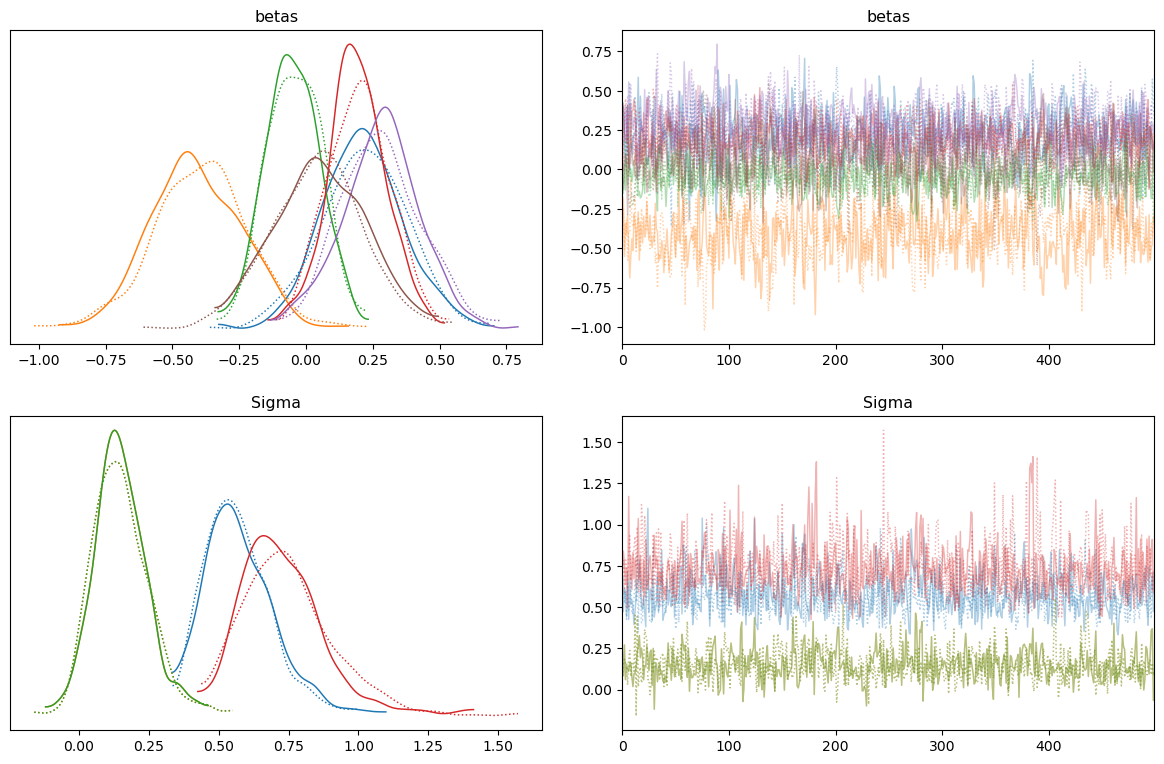


Trace plots for n=60, p=4, m=3


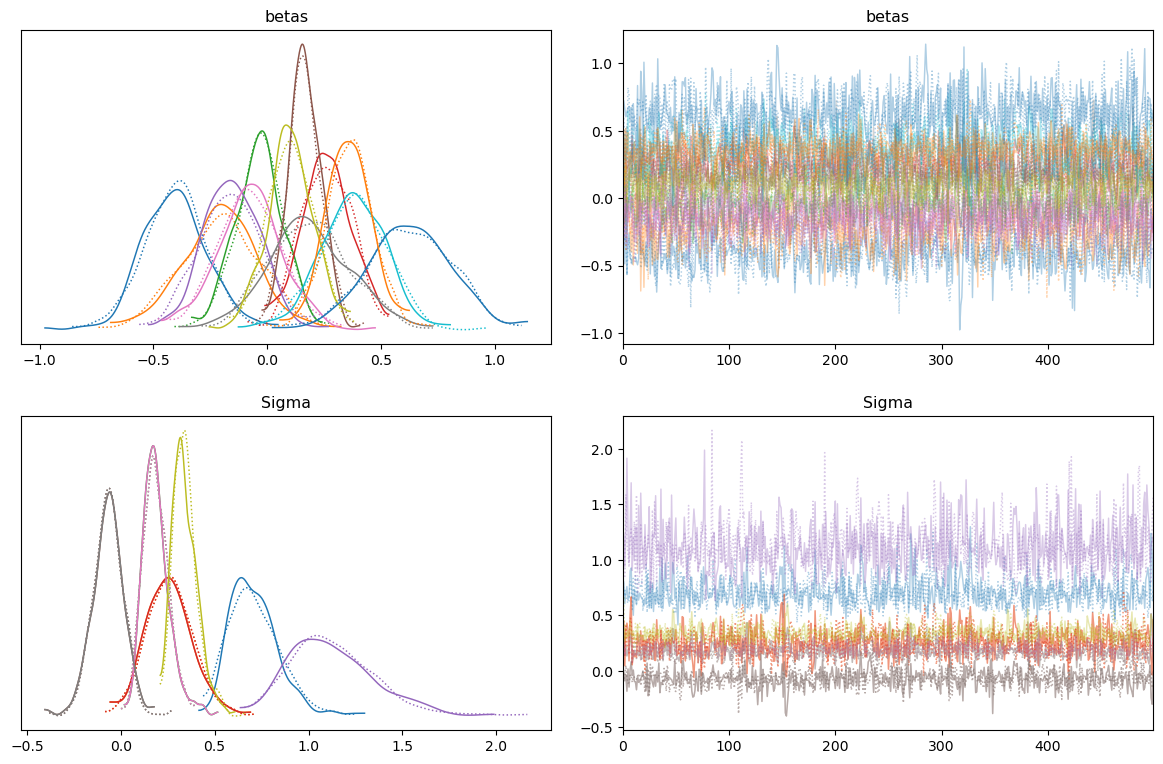


Trace plots for n=80, p=5, m=4


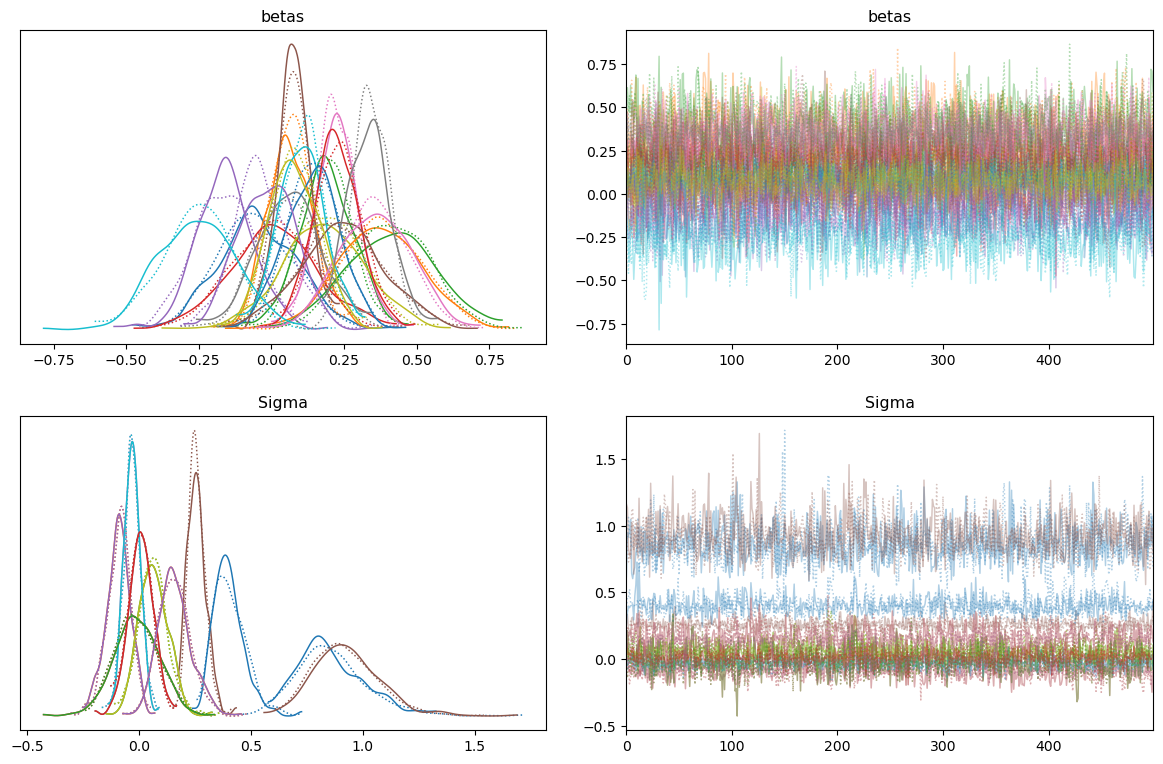


Trace plots for n=100, p=6, m=5


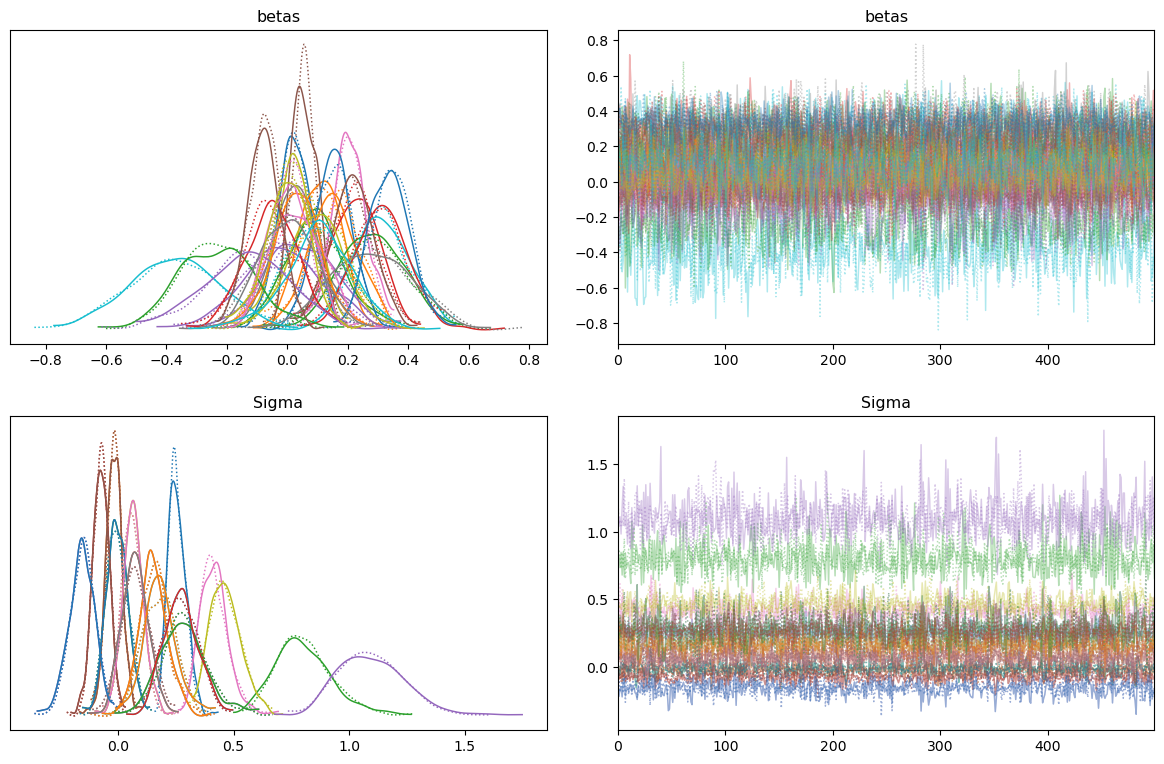

In [9]:
# Loop to show trace plots for each n, p, m combo
for (n, p, m), trace in traces.items():
    print(f"\nTrace plots for n={n}, p={p}, m={m}")
    
    az.plot_trace(trace, var_names=['betas', 'Sigma'], figsize=(12, 8))
    plt.tight_layout(pad=2)
    plt.show()

#### Posterior Covariance matrix 


Posterior covariance matrix (Sigma) for n=50, p=3, m=2


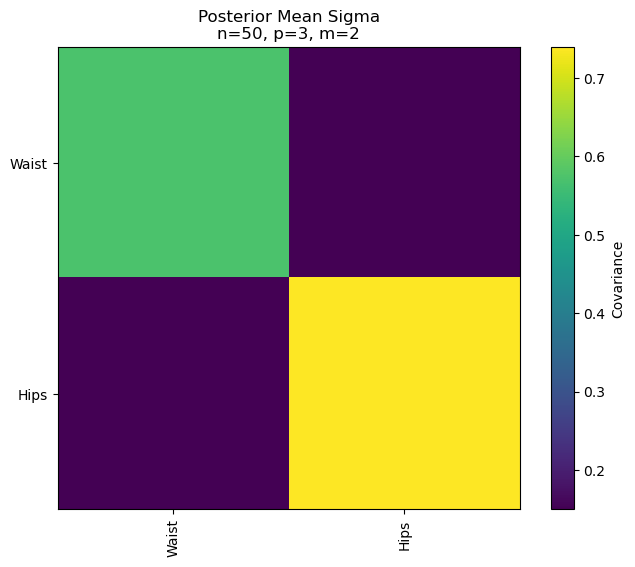


Posterior covariance matrix (Sigma) for n=60, p=4, m=3


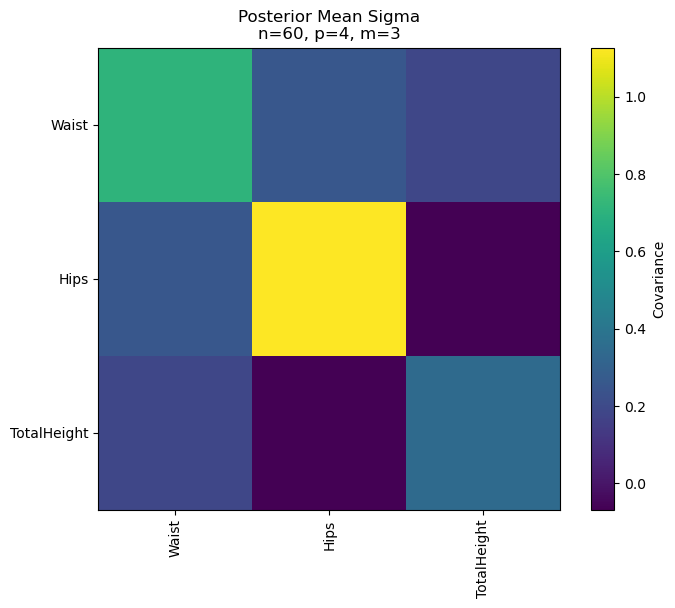


Posterior covariance matrix (Sigma) for n=80, p=5, m=4


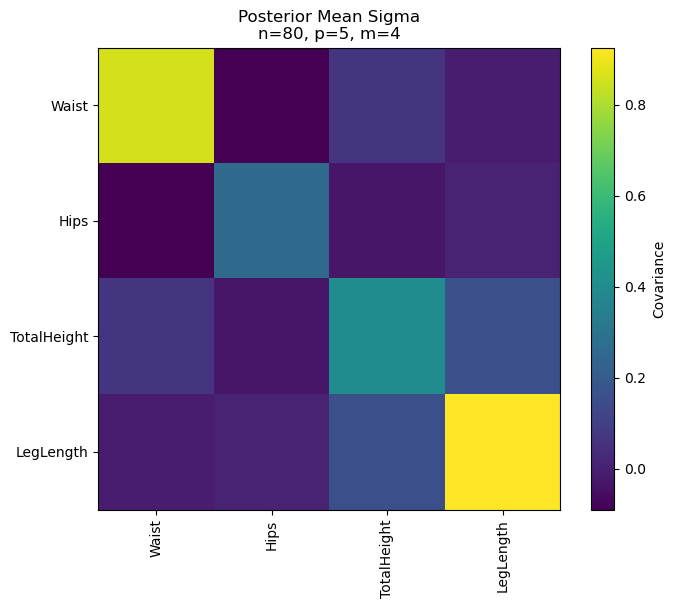


Posterior covariance matrix (Sigma) for n=100, p=6, m=5


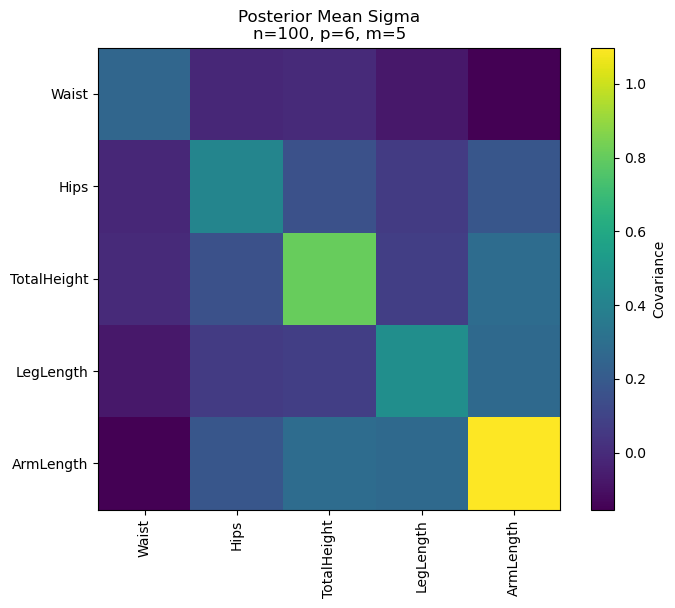

In [10]:
# Loop to plot the posterior covariance matrices (Sigma) for each n, p, m combo
for (n, p, m), trace in traces.items():
    print(f"\nPosterior covariance matrix (Sigma) for n={n}, p={p}, m={m}")
    
    mean_sigma = trace.posterior['Sigma'].mean(dim=('chain', 'draw')).values
    
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_sigma, cmap='viridis')
    plt.title(f'Posterior Mean Sigma\nn={n}, p={p}, m={m}')
    plt.colorbar(label='Covariance')
    plt.xticks(ticks=range(m), labels=outcome_cols[:m], rotation=90)
    plt.yticks(ticks=range(m), labels=outcome_cols[:m])
    plt.show()


## Question 3 

#### Using a dataset of failed startups in the Finance and Insurance sector, modeling multiple binary outcomes that represent different reasons for startup failure. The dataset includes information on startup names, industries, years of operation, funding amounts, and a series of binary indicators representing the specific reasons why each startup failed. These binary outcomes capture factors such as competition, poor market fit, execution flaws, and regulatory pressure.

In [11]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Startup Failure (Finance and Insurance).csv'
startup_df = pd.read_csv(file_path)

# Clean 'Years of Operation' → extract numeric lifespan (years)
def extract_years_fixed(text):
    if pd.isnull(text):
        return np.nan
    if '-' in text:
        years = text.split('-')
        return int(years[1]) - int(years[0]) + 1
    import re
    match = re.search(r'\d+', text)
    if match:
        return int(match.group(0))
    return np.nan

startup_df['Years_of_Operation_Num'] = startup_df['Years of Operation'].apply(extract_years_fixed)

# Clean 'How Much They Raised' → convert funding to millions
def convert_funding(amount):
    if pd.isnull(amount):
        return np.nan
    amount = amount.strip().replace('$', '').replace(',', '').lower()
    import re
    if 'm' in amount:
        value = re.search(r'\d+(\.\d+)?', amount)
        return float(value.group(0)) if value else np.nan
    elif 'b' in amount:
        value = re.search(r'\d+(\.\d+)?', amount)
        return float(value.group(0)) * 1000 if value else np.nan
    else:
        value = re.search(r'\d+(\.\d+)?', amount)
        return float(value.group(0)) if value else np.nan

startup_df['Funding_M'] = startup_df['How Much They Raised'].apply(convert_funding)

# Define predictors and binary outcomes
predictor_cols = ['Years_of_Operation_Num', 'Funding_M']
outcome_cols = [
    'Giants', 'No Budget', 'Competition', 'Poor Market Fit',
    'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure',
    'Niche Limits', 'Execution Flaws', 'Trend Shifts',
    'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype'
]

# Clean the dataset by dropping rows with missing predictor or outcome data
clean_df = startup_df.dropna(subset=predictor_cols + outcome_cols)

# Extract X and y
X_full = clean_df[predictor_cols].values
y_full = clean_df[outcome_cols].values

# Standardize predictors
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_full)

#### Build the Bayesian Multivariate Classification Model

In [12]:
def run_bayesian_multivariate_classification(n, p, m):
    # Select predictors (X) and binary outcomes (y)
    X = X_scaled[:n, :p]
    y = y_full[:n, :m]

    with pm.Model() as BMC_model:
        
        # Prior over regression coefficients (p x m)
        betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
        
        # LKJ prior for latent covariance of z
        packed_L = pm.LKJCholeskyCov('packed_L', n=m, eta=2.0,
                                     sd_dist=pm.Exponential.dist(1.0, shape=m),
                                     compute_corr=False)
        
        L = pm.expand_packed_triangular(m, packed_L)
        Sigma = pm.Deterministic('Sigma', L.dot(L.T))
        
        # Latent z ~ MVN(X @ betas, Sigma)
        z = pm.MvNormal('z', mu=pm.math.dot(X, betas), chol=L, shape=(n, m))
        
        # Observed binary outcomes via Bernoulli with invprobit link
        y_obs = pm.Bernoulli('y_obs', p=pm.math.invprobit(z), observed=y)
        
        # Sampling (lighter to keep fast)
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9, return_inferencedata=True)

    return trace

#### Run the Bayesian Multivariate Classification Model

In [18]:
# Define combinations of n, p, m to explore
combinations = [
    (10, 2, 2),
    (20, 2, 2),
    (40, 2, 3)  # 46 is the max number of rows in your cleaned data
]

# Run the loop and collect traces
traces = {}

for n, p, m in combinations:
    print(f"\nRunning Bayesian Multivariate Classification for n={n}, p={p}, m={m}")
    
    trace = run_bayesian_multivariate_classification(n, p, m)
    
    traces[(n, p, m)] = trace
    
    print(f"Finished model for n={n}, p={p}, m={m}\n{'-'*50}")


Running Bayesian Multivariate Classification for n=10, p=2, m=2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L, z]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 148 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model for n=10, p=2, m=2
--------------------------------------------------

Running Bayesian Multivariate Classification for n=20, p=2, m=2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L, z]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 127 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model for n=20, p=2, m=2
--------------------------------------------------

Running Bayesian Multivariate Classification for n=40, p=2, m=3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, packed_L, z]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 167 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Finished model for n=40, p=2, m=3
--------------------------------------------------


####  Trace Summaries

In [19]:
for (n, p, m), trace in traces.items():
    print(f"\nPosterior summary for n={n}, p={p}, m={m}")
    
    summary = az.summary(trace, var_names=['betas', 'Sigma'], round_to=2)
    
    display(summary)


Posterior summary for n=10, p=2, m=2


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.67  0.73   -2.16     0.66       0.04     0.05    333.21   
betas[0, 1]  0.81  0.75   -0.70     2.17       0.04     0.03    334.93   
betas[1, 0]  0.48  0.64   -0.82     1.60       0.05     0.04    196.84   
betas[1, 1]  0.34  0.67   -0.84     1.58       0.06     0.04    106.04   
Sigma[0, 0]  3.06  4.52    0.01    12.01       0.67     0.79     22.86   
Sigma[0, 1] -0.95  1.59   -4.78     0.56       0.18     0.16     87.55   
Sigma[1, 0] -0.95  1.59   -4.78     0.56       0.18     0.16     87.55   
Sigma[1, 1]  3.04  3.84    0.01    10.44       0.41     0.30     52.13   

             ess_tail  r_hat  
betas[0, 0]    320.95   1.01  
betas[0, 1]    320.59   1.00  
betas[1, 0]    260.67   1.02  
betas[1, 1]    127.27   1.02  
Sigma[0, 0]     34.02   1.09  
Sigma[0, 1]    195.28   1.03  
Sigma[1, 0]    195.28   1.03  
Sigma[1, 1]     46.90   1.02


Posterior summary for n=20, p=2, m=2


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.53  0.64   -1.65     0.77       0.03     0.03    391.71   
betas[0, 1]  0.59  0.74   -0.74     2.07       0.03     0.03    452.08   
betas[1, 0]  0.70  0.53   -0.22     1.71       0.03     0.02    346.62   
betas[1, 1] -0.20  0.57   -1.28     0.90       0.02     0.02    551.59   
Sigma[0, 0]  4.41  3.77    0.09    11.17       0.42     0.20     61.75   
Sigma[0, 1] -3.42  2.94   -8.74     0.13       0.33     0.18     80.61   
Sigma[1, 0] -3.42  2.94   -8.74     0.13       0.33     0.18     80.61   
Sigma[1, 1]  8.72  8.58    0.08    25.43       0.96     0.70     68.09   

             ess_tail  r_hat  
betas[0, 0]    258.63   1.00  
betas[0, 1]    527.32   1.01  
betas[1, 0]    489.32   1.00  
betas[1, 1]    495.61   1.00  
Sigma[0, 0]    103.42   1.06  
Sigma[0, 1]    285.62   1.04  
Sigma[1, 0]    285.62   1.04  
Sigma[1, 1]    117.93   1.02


Posterior summary for n=40, p=2, m=3


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]   0.12   0.53   -0.83     1.15       0.05     0.03    133.24   
betas[0, 1]   0.53   0.67   -0.78     1.84       0.06     0.04    127.07   
betas[0, 2]  -0.20   0.54   -1.23     0.85       0.04     0.03    156.93   
betas[1, 0]   0.09   0.59   -1.00     1.16       0.07     0.03     81.60   
betas[1, 1]   0.40   0.57   -0.69     1.40       0.04     0.02    174.45   
betas[1, 2]   0.06   0.48   -0.73     1.00       0.03     0.02    203.62   
Sigma[0, 0]   7.27   3.40    1.62    13.35       0.48     0.30     55.42   
Sigma[0, 1]  -7.31   3.32  -13.76    -2.53       0.51     0.30     44.41   
Sigma[0, 2]   5.40   1.95    1.90     9.09       0.25     0.10     62.62   
Sigma[1, 0]  -7.31   3.32  -13.76    -2.53       0.51     0.30     44.41   
Sigma[1, 1]  14.62  10.61    1.72    35.78       2.33     1.82     24.43   
Sigma[1, 2]  -7.64   3.12  -13.71    -2.60       0.49     0.33     47.11   
Sigma[2, 0]   5.40   1.95    1.90     9.09       0.25     0.10     62.62   
Sigma[2, 1]  -7.64   3.12  -13.71    -2.60       0.49     0.33     47.11   
Sigma[2, 2]   6.75   2.74    2.46    12.44       0.29     0.22     97.68   

             ess_tail  r_hat  
betas[0, 0]    181.95   1.02  
betas[0, 1]    149.58   1.03  
betas[0, 2]    184.93   1.00  
betas[1, 0]    184.76   1.03  
betas[1, 1]    307.78   1.03  
betas[1, 2]    337.00   1.01  
Sigma[0, 0]     58.25   1.04  
Sigma[0, 1]    125.92   1.05  
Sigma[0, 2]    184.89   1.04  
Sigma[1, 0]    125.92   1.05  
Sigma[1, 1]     65.05   1.09  
Sigma[1, 2]     75.87   1.06  
Sigma[2, 0]    184.89   1.04  
Sigma[2, 1]     75.87   1.06  
Sigma[2, 2]    104.85   1.03

#### Trace Plots 


Trace plots for n=10, p=2, m=2


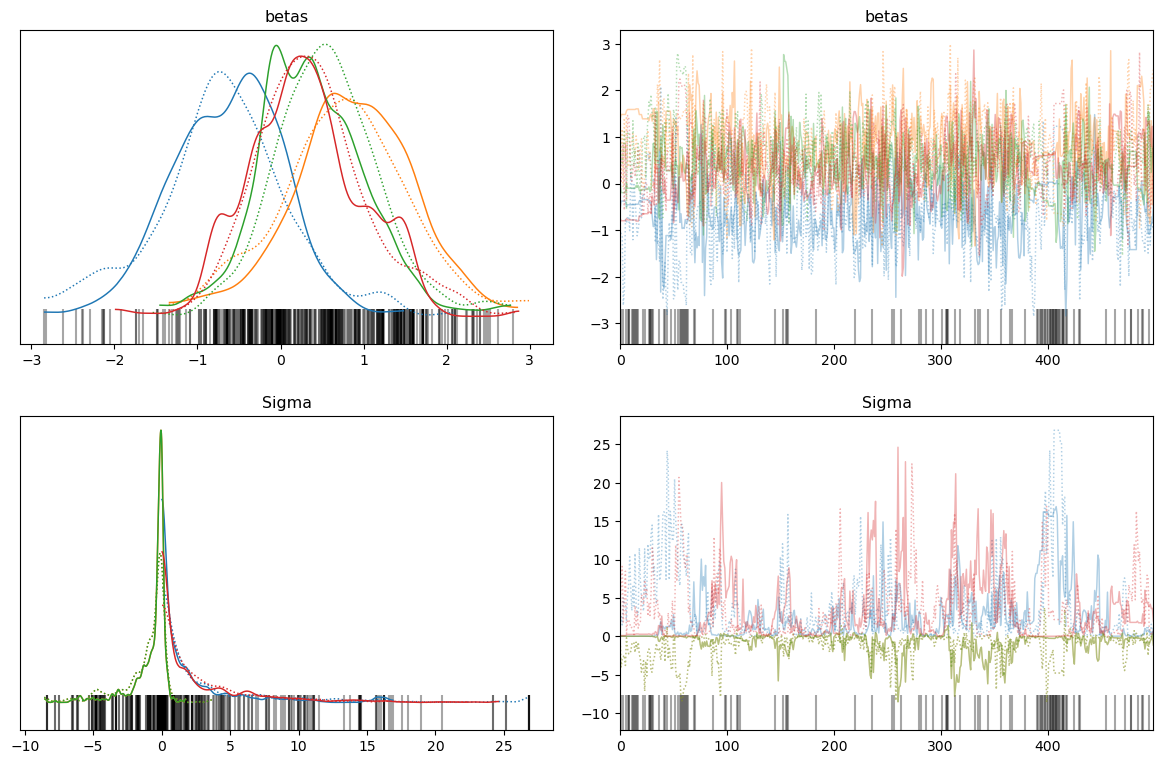


Trace plots for n=20, p=2, m=2


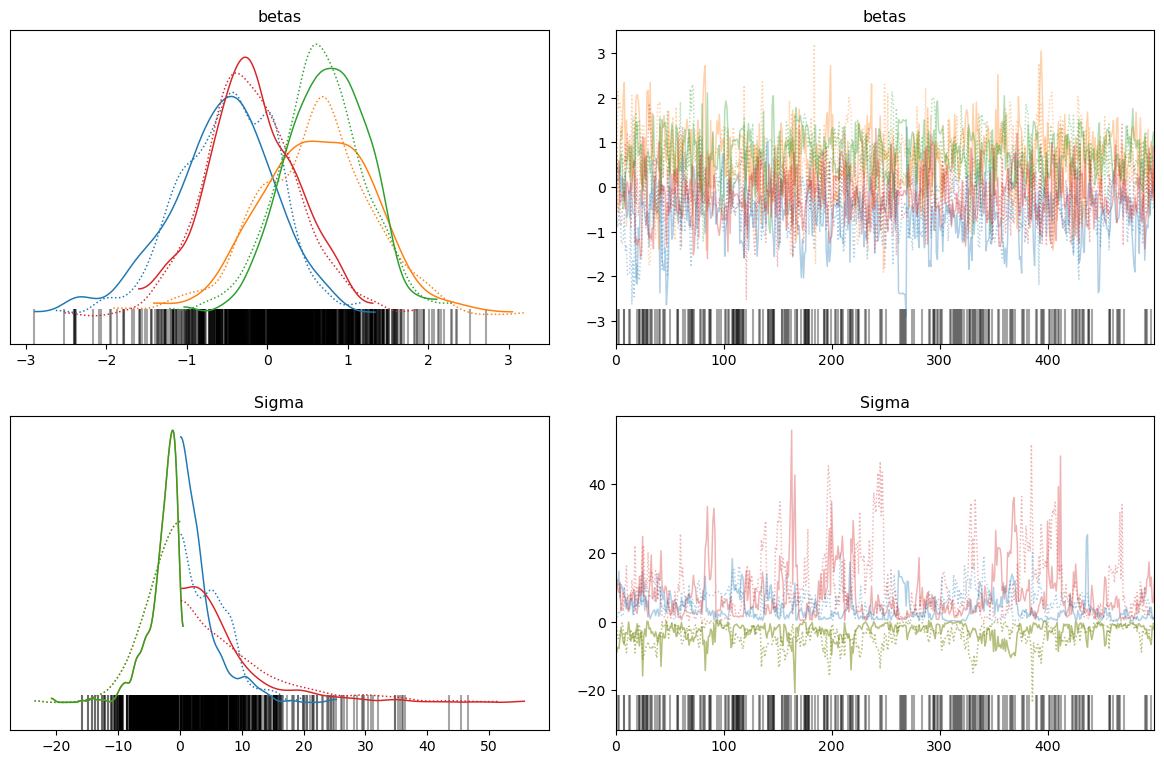


Trace plots for n=40, p=2, m=3


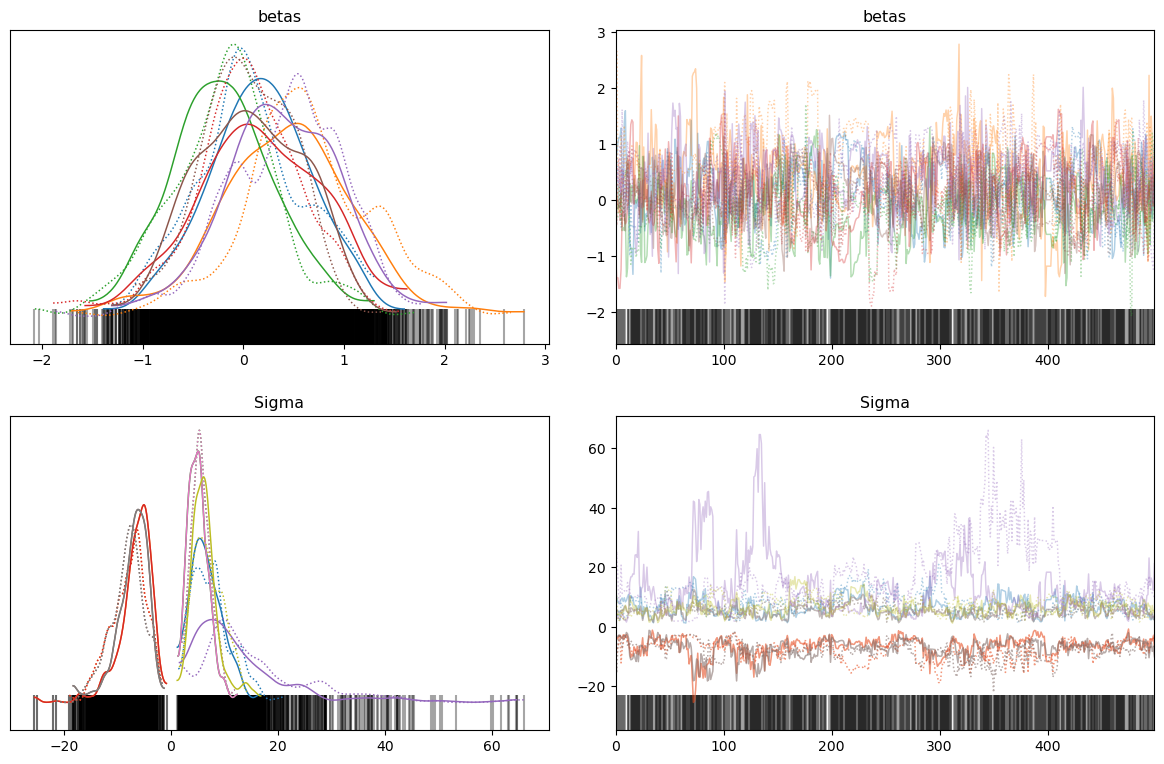

In [20]:
for (n, p, m), trace in traces.items():
    print(f"\nTrace plots for n={n}, p={p}, m={m}")
    
    az.plot_trace(trace, var_names=['betas', 'Sigma'], figsize=(12, 8))
    plt.tight_layout(pad=2)
    plt.show()

#### Visualize the Posterior Mean of the Latent Covariance Matrix (Sigma)


Covariance matrix (Sigma) for n=10, p=2, m=2


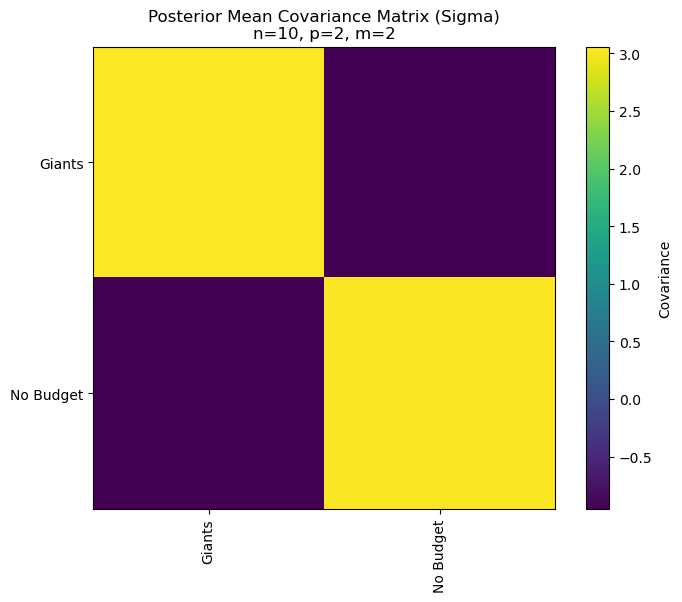


Covariance matrix (Sigma) for n=20, p=2, m=2


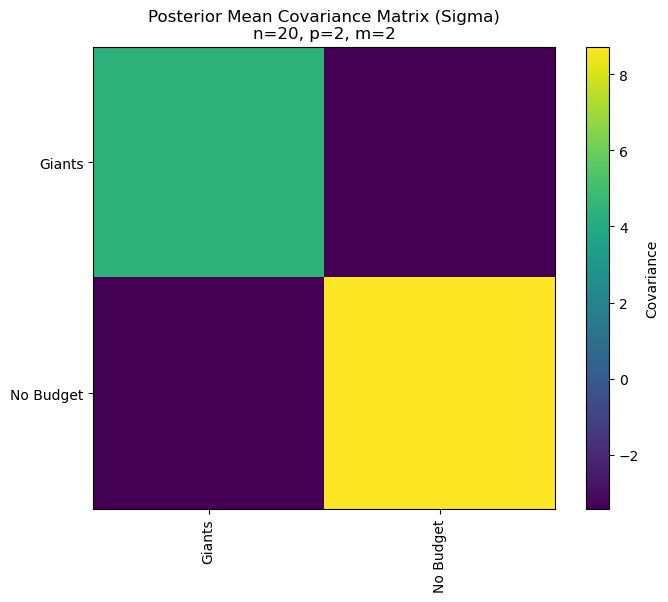


Covariance matrix (Sigma) for n=40, p=2, m=3


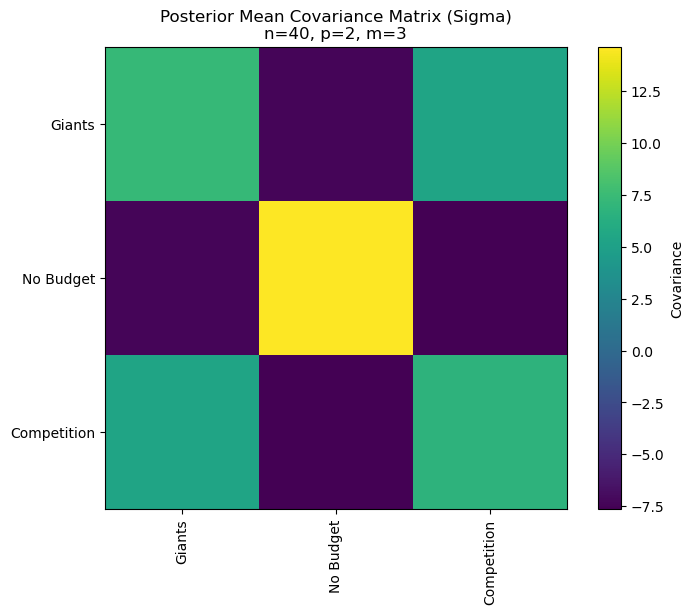

In [21]:
for (n, p, m), trace in traces.items():
    print(f"\nCovariance matrix (Sigma) for n={n}, p={p}, m={m}")
    
    mean_sigma = trace.posterior['Sigma'].mean(dim=('chain', 'draw')).values
    
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_sigma, cmap='viridis')
    plt.title(f'Posterior Mean Covariance Matrix (Sigma)\nn={n}, p={p}, m={m}')
    plt.colorbar(label='Covariance')
    plt.xticks(ticks=range(m), labels=outcome_cols[:m], rotation=90)
    plt.yticks(ticks=range(m), labels=outcome_cols[:m])
    plt.show()